In [28]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize']=(8,5)
sns.set()
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
ad=pd.read_csv("Advertising.csv")
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Dataset Description

### Dataset Description: Advertising

This dataset, called **Advertising**, includes information about how much money was spent on TV, radio, and newspaper ads, and the sales that resulted from these ads. There are 200 entries in the dataset, with each entry representing a different advertising campaign.

**Columns:**
- **Unnamed: 0**: Just an index number (not important for analysis).
- **TV**: Money spent on TV ads (in thousands of dollars).
- **Radio**: Money spent on radio ads (in thousands of dollars).
- **Newspaper**: Money spent on newspaper ads (in thousands of dollars).
- **Sales**: The number of sales made after the ads (in thousands of units).

This dataset will be used to predict sales based on how much is spent on different types of advertising.

## Cleaning And Understanding Data

In [30]:
ad=pd.read_csv("Advertising.csv")
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
ad.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [32]:
ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [33]:
ad.shape

(200, 5)

In [34]:
#Dropping the irrelevant column
ad_drop = ad.drop(columns=["Unnamed: 0"],axis = 1)
ad_drop

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Visualizing Data Distribution:

### 1. **Histogram**
- **Purpose**: To visualize how the numerical features are distributed.
- **Columns**: TV, Radio, Newspaper, Sales.
- **Why**: Helps identify the distribution of ad spending and sales, including any skewness or peaks.

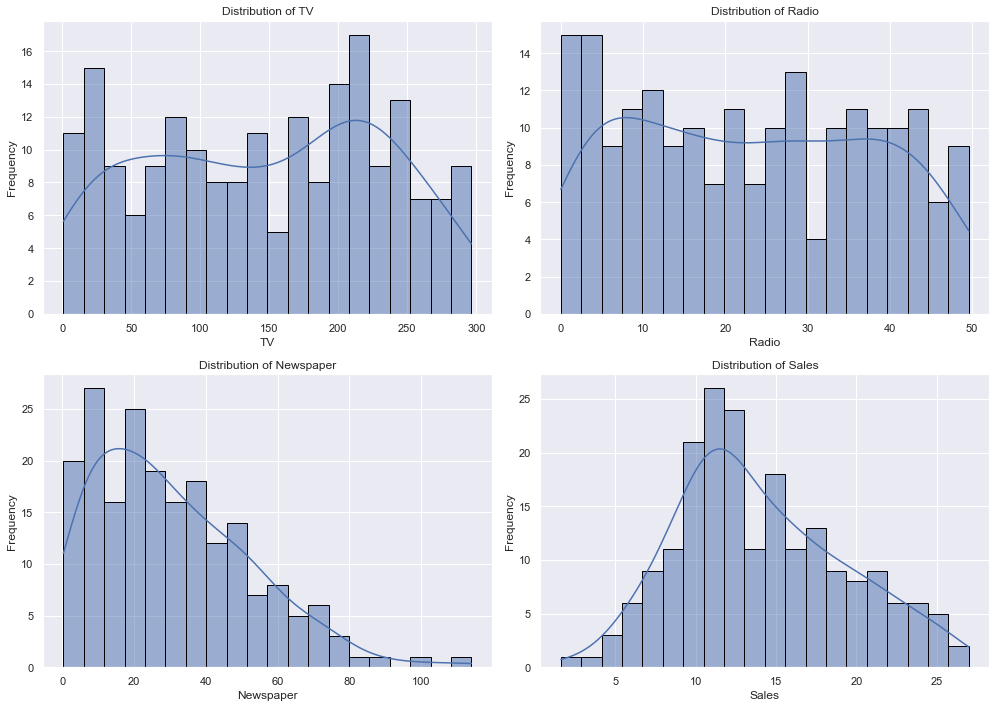

In [35]:
#plotting the histogram for each features 
features = ["TV", "Radio", "Newspaper", "Sales"]
plt.figure(figsize=(14,10))
for i, feature in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(ad_drop[feature],bins =20,palette="viridis",cbar=True,kde=True,edgecolor="black")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

1. **TV and Radio**: These distributions are relatively flat and not skewed, meaning they are spread more evenly across their range.
2. **Newspaper**: This distribution is **right-skewed** (not normally distributed), with most of the data concentrated on the left and a long tail to the right.
3. **Sales**: This distribution is **right-skewed** as well, with most of the values lower and fewer higher values.

### Log Transformation to Reduce Skewness of Sales column to improve the performance

In [36]:
# Apply log transformation to the Sales column
ad_drop['log_Sales'] = np.log(ad_drop['Sales'] + 1)
ad_drop

,TV,Radio,Newspaper,Sales,log_Sales
0,230.1,37.8,69.2,22.1,3.139833
1,44.5,39.3,45.1,10.4,2.433613
2,17.2,45.9,69.3,9.3,2.332144
3,151.5,41.3,58.5,18.5,2.970414
4,180.8,10.8,58.4,12.9,2.631889
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,2.151762
196,94.2,4.9,8.1,9.7,2.370244
197,177.0,9.3,6.4,12.8,2.624669
198,283.6,42.0,66.2,25.5,3.277145


### 2. **Scatter Plot**
   - **Purpose**: To examine relationships between ad spend on different media and sales.
   - **Columns**:
     - **TV vs. Sales**: To understand the relationship between TV ad spend and sales.
     - **Radio vs. Sales**: To explore how radio ad spend correlates with sales.
     - **Newspaper vs. Sales**: To see if there’s a connection between newspaper ad spend and sales.
   - **Why**: Helps identify trends and correlations between ad expenditures and sales.

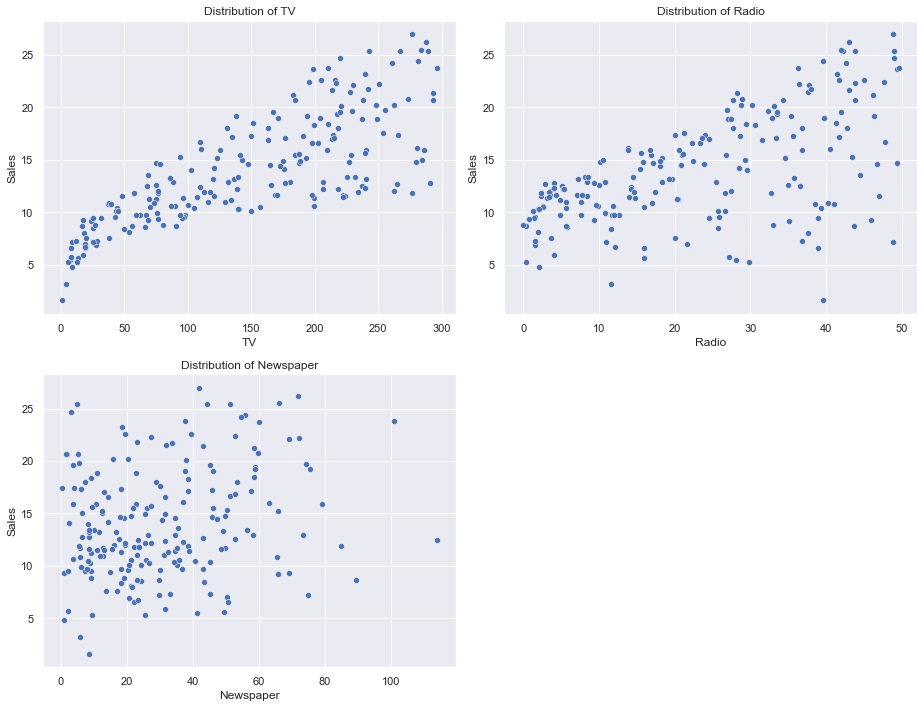

In [37]:
#plotting the histogram for each features 
features = ['TV','Radio','Newspaper']
plt.figure(figsize=(13, 10))
for i, feature in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.scatterplot(ad_drop[feature],ad_drop["Sales"],palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

### Target Variable: Sales

1. **Highly Correlated Features**:
   - *TV*: There is a strong positive correlation between TV advertising and sales. As the investment in TV ads increases, there is a noticeable increase in sales, indicating that TV advertising has a significant impact on driving sales.

2. **Moderately Correlated Features**:
   - *Radio*: There is a moderate positive correlation between radio advertising and sales. Higher spending on radio ads tends to be associated with increased sales, though the relationship is not as strong as that with TV.

3. **Less Correlated Features**:
   - *Newspaper*: There appears to be little to no correlation between newspaper advertising and sales. The data points are more scattered, suggesting that spending on newspaper ads does not have a clear impact on sales.

**The observations suggest focusing on TV and Radio advertising strategies to optimize sales performance, while newspaper advertising may be less effective in driving sales.**

### 3. **Bar Plot**
- **Purpose**: To show the distribution of ad spending across different media types.
- **Columns**:
  - **TV, Radio, Newspaper**: Shows the total spend on each media type.
- **Why**: Helps visualize which advertising channels receive the most investment and if there’s a preference for one type of media over another.

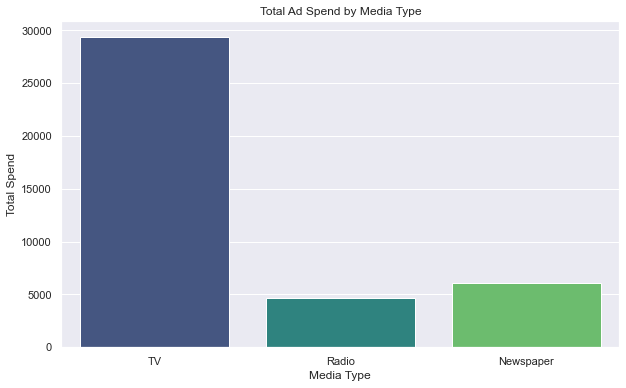

In [38]:
# Group by each media type to sum up the ad spending
ad_spend = ad_drop[['TV', 'Radio', 'Newspaper']].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ad_spend.index, y=ad_spend.values, palette="viridis")

# Add titles and labels
plt.title('Total Ad Spend by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Total Spend')

# Show the plot
plt.show()


1. **TV**: The model shows that spending on TV ads has a strong positive impact on sales, so it will recommend investing more in TV.

2. **Newspaper**: The model finds newspapers have a moderate effect on sales, suggesting a balanced investment.

3. **Radio**: The model shows radio ads have a weaker impact, so it will suggest spending less or rethinking the strategy.

**Summary**: The model guides investment by focusing on TV for the biggest sales boost, using newspapers effectively, and reducing or reworking radio ad spending.

## Visualizing the Transformed sales data

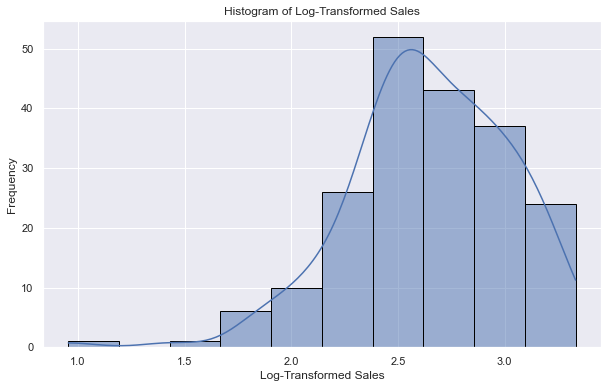

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(ad_drop['log_Sales'], bins=10, kde=True,palette='viridis',edgecolor="black")
plt.title('Histogram of Log-Transformed Sales')
plt.xlabel('Log-Transformed Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

1. **Distribution**: The log-transformed sales data is more normal, with a slight skew.
2. **Skewness**: Skewness is reduced, with most data centered.
3. **Normality**: The data is more normal, but not perfect.

- The log transformation is good for modeling. I'll also try the Box-Cox transformation to make it more normally distributed.

In [59]:
from scipy import stats
ad_drop['Sales'] = ad_drop['Sales'] + 1  

# Apply Box-Cox transformation
ad_drop['boxcox_Sales'], lambda_ = stats.boxcox(ad_drop['Sales'])


In [60]:
ad_drop

,TV,Radio,Newspaper,Sales,log_Sales,boxcox_Sales
0,230.1,37.8,69.2,25.1,3.139833,7.199633
1,44.5,39.3,45.1,13.4,2.433613,4.893733
2,17.2,45.9,69.3,12.3,2.332144,4.626185
3,151.5,41.3,58.5,21.5,2.970414,6.569489
4,180.8,10.8,58.4,15.9,2.631889,5.459659
...,...,...,...,...,...,...
195,38.2,3.7,13.8,10.6,2.151762,4.185193
196,94.2,4.9,8.1,12.7,2.370244,4.724953
197,177.0,9.3,6.4,15.8,2.624669,5.438010
198,283.6,42.0,66.2,28.5,3.277145,7.750232


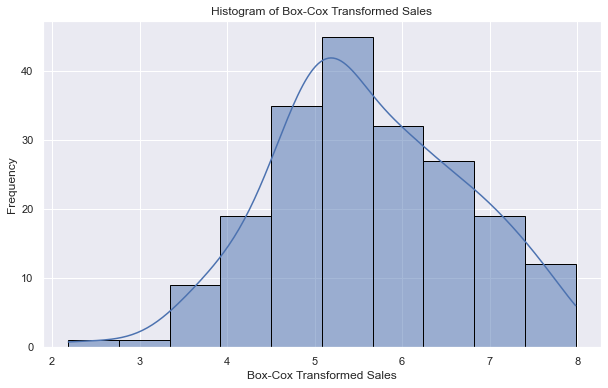

In [67]:
# Plot histogram of Box-Cox transformed Sales
plt.figure(figsize=(10, 6))
sns.histplot(ad_drop['boxcox_Sales'], bins=10,kde = True,palette="viridis",edgecolor="black")
plt.title('Histogram of Box-Cox Transformed Sales')
plt.xlabel('Box-Cox Transformed Sales')
plt.ylabel('Frequency')
plt.show()

1. **Normal Distribution**: The Box-Cox transformed sales data looks more bell-shaped, showing it’s closer to a normal distribution.
2. **Central Tendency**: Most data points cluster around a value of 5, indicating the center of the transformed data.
3. **Symmetry**: The distribution is mostly symmetrical, with a slight tilt to the right but generally balanced.

These observations suggest that the Box-Cox transformation has effectively normalized the sales data, making it better for further analysis.

## Feature Slection By Correlation

In [68]:
ad_drop_corr=ad_drop.corr()
ad_drop_corr

,TV,Radio,Newspaper,Sales,log_Sales,boxcox_Sales
TV,1.000000,0.054809,0.056648,0.782224,0.791985,0.795885
Radio,0.054809,1.000000,0.354104,0.576223,0.488411,0.544094
Newspaper,0.056648,0.354104,1.000000,0.228299,0.212871,0.221462
Sales,0.782224,0.576223,0.228299,1.000000,0.965800,0.993784
log_Sales,0.791985,0.488411,0.212871,0.965800,1.000000,0.988230
boxcox_Sales,0.795885,0.544094,0.221462,0.993784,0.988230,1.000000


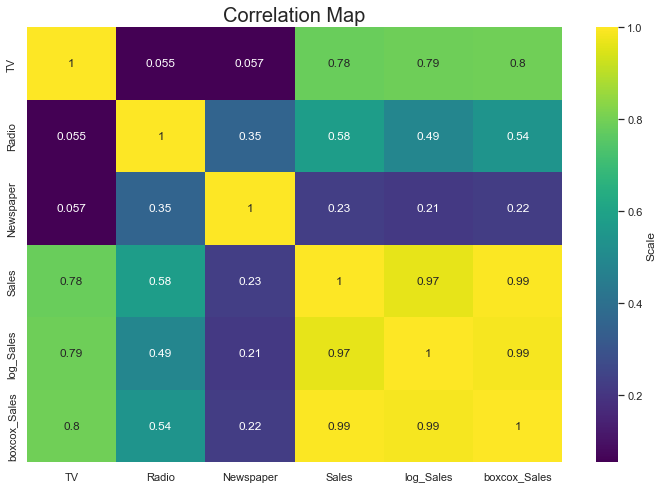

In [69]:
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.heatmap(data=ad_drop_corr, annot=True, cmap='viridis', cbar_kws={"label": "Scale"})
plt.title("Correlation Map", fontsize=20)
plt.show()


**Highly Correlated with `boxcox_Sales`:**
- **Sales** (0.99)
- **log_Sales** (0.99)
- **TV** (0.80)

**Less Correlated with `boxcox_Sales`:**
- **Radio** (expected to be low)
- **Newspaper** (0.22)

**Observations:**
- **Sales** and **log_Sales** are almost perfectly correlated with `boxcox_Sales`, as they are direct transformations.
- **TV** is strongly correlated, making it a significant predictor.
- **Radio** and **Newspaper** show weak correlations, indicating less impact on `boxcox_Sales`.

**Recommended Regression Algorithms:**
1. **Linear Regression**: Good for capturing strong linear relationships.
2. **Ridge Regression**: Helps manage interrelated features and prevent overfitting.

In [70]:
#Splitting The Dependent/Target and Independent variable
X=ad_drop.drop(columns=["boxcox_Sales"],axis = 1)
X

,TV,Radio,Newspaper,Sales,log_Sales
0,230.1,37.8,69.2,25.1,3.139833
1,44.5,39.3,45.1,13.4,2.433613
2,17.2,45.9,69.3,12.3,2.332144
3,151.5,41.3,58.5,21.5,2.970414
4,180.8,10.8,58.4,15.9,2.631889
...,...,...,...,...,...
195,38.2,3.7,13.8,10.6,2.151762
196,94.2,4.9,8.1,12.7,2.370244
197,177.0,9.3,6.4,15.8,2.624669
198,283.6,42.0,66.2,28.5,3.277145


In [72]:
# Target variable/Dependent column
y=ad_drop[["boxcox_Sales"]]  
y

,boxcox_Sales
0,7.199633
1,4.893733
2,4.626185
3,6.569489
4,5.459659
...,...
195,4.185193
196,4.724953
197,5.438010
198,7.750232


In [73]:
scaler = StandardScaler() 
scaler

StandardScaler()

In [74]:
X_normalize=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalize

,TV,Radio,Newspaper,Sales,log_Sales
0,0.969852,0.981522,1.778945,1.552053,1.323461
1,-1.197376,1.082808,0.669579,-0.696046,-0.564351
2,-1.516155,1.528463,1.783549,-0.907406,-0.835592
3,0.052050,1.217855,1.286405,0.860330,0.870585
4,0.394182,-0.841614,1.281802,-0.215683,-0.034336
...,...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053,-1.317775
196,-0.617035,-1.240003,-1.033598,-0.830548,-0.733746
197,0.349810,-0.942899,-1.111852,-0.234898,-0.053637
198,1.594565,1.265121,1.640850,2.205347,1.690513


In [78]:
#Splitting the data into Training and Testing Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2,random_state = 42)

In [79]:
#The length of the trained set
len(X_train)

160

In [80]:
#The length of the test set
len(y_train)

160

In [84]:
# Initialize models
models = {
    'ridge_regressor': Ridge(),
    'linear_regressor': LinearRegression(),
}



# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)



ridge_regressor Results:
MAE: 0.02
MSE: 0.00
RMSE: 0.03
R^2 Score: 1.00
------------------------------
linear_regressor Results:
MAE: 0.01
MSE: 0.00
RMSE: 0.02
R^2 Score: 1.00
------------------------------


## Hypaparameter Tuning 

In [86]:
from sklearn.model_selection import GridSearchCV

ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Initialize models
models = {
    'ridge_regressor': GridSearchCV(estimator=Ridge(), param_grid=ridge_param_grid, 
                                    scoring='neg_mean_squared_error', cv=5),
    'linear_regressor': GridSearchCV(estimator=LinearRegression(), param_grid={}, 
                                     scoring='neg_mean_squared_error', cv=5)
}

# Train and evaluate models
best_model_name = None
best_model_score = float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
# Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
# Print results
    print(f"{name} Results:")
    print(f"Best Parameters: {model.best_params_}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)
    
# Determine the best model
    if mse < best_model_score:
        best_model_name = name
        best_model_score = mse

print(f"Best Model: {best_model_name} with MSE: {best_model_score:.2f}")


ridge_regressor Results:
Best Parameters: {'alpha': 0.1}
MAE: 0.01
MSE: 0.00
RMSE: 0.02
R^2 Score: 1.00
------------------------------
linear_regressor Results:
Best Parameters: {}
MAE: 0.01
MSE: 0.00
RMSE: 0.02
R^2 Score: 1.00
------------------------------
Best Model: linear_regressor with MSE: 0.00


**Conclusion: Both models perform equally well in terms of MAE, MSE, RMSE, and R² Score, achieving perfect scores. However, the Linear Regressor is chosen as the best model based on the result, as it does not involve regularization and provides the same performance metrics.**

## Saving the best model using Joblib

In [89]:
import joblib
joblib.dump(best_model_name, f"{best_model_name}.pkl")

print(f"Model saved as {best_model_name}.pkl")

Model saved as linear_regressor.pkl
